Just want to take notes on some ideas
- look at ign top 100 (or some other number), see if I can come up with my own and compare to their list
    - can try a few different models to see how they vary 
    - will clearly have a problem for games that don't have reviews
- think of a way to visualize the semantic meaning (polarity and other thing) of words with the score
    - plot it based on various authors, certain authors might just be more negative
- compare various semantic meanings of authors
- examine lengths of reviews based on score and author
- maybe compare to other review website
- try to create a feature to rank all games
- could expand this to reviewers, and what I can find elsewhere
- look at release dates of games (what day and time of year)
    - might be a correlation between high ranked games and time of year/day
- try to create a feature where you write a review, and then it assigns a score based on the review
- try to find features that most impact scores


- use various advanced deep learning NN to try to predict scores based on words
- try gpt-2-simple (or something like it) to predict what a review would say
- try other review generation methods to come up with reviews
    - create your own review generation method
- make a GAN to trick some of my classifiers about how real the review is
    - if I can trick it, compare that review with real reviews, see if it's meaningful
    
- try to generate an IGN review based on information from other places (tags about game, comments from other websites, etc)

- could try to use some aspects of the model (comparing score to review) to see if it works for movie reviews as well
- Aside from the link, you could also try some unsupervised techniques to see what words or phrases show up the most, along with trying that with ngrams.
- When I try to remove sections in the text (start div ... end div) I can create a second function to count how many remain at the end to get an idea of how clean the text is

- can examine individual sentences and see which ones have the most positive sentiment
- can try to get text from Game Grumps to see how they feel about given games
- maybe try to find some examples of very polar language

- Could also try training my own model to perform sentiment analysis, and see if that yields better results over textblob, and at the very least just compare with it

# Some questions and ideas raised in my first eda pass

In an effort to understand these plots a little better, lets take some averages of the data in bins (either half a point to a point) and see average word length. Should also plot the standard deviation

- Could try to redistribute scores based on my understanding of their score criteria (https://corp.ign.com/review-practices) and just renormalizing it. 

- Could ask the question, what's the probability that a low score review gets many words written about it (bayesian stats BaBy!)

- Can also compare the Bayesian approach to asking the question above and compare it to moving some number of standard deviations away from the mean

- Questions: Are there similar tags between all games with short word counts? Are they mobile games? Or do a lot of them have authors in common?

# Additional questions from the same file

Here I've split up the score into bins (not of equal sizes) to see average word count for each bin. Some follow up questions:
- How does the data look if I split the bins equally, i.e. if I have 10k reviews, each bin gets 1000 reviews going from lowest score to highest. What if I do 5 bins? This might give me a quick way to renormalize all of my data for a new scoring metric. How would this compare to mapping the scoring system to a normalized gaussian?

- What if I create word bins? What is the average score for a given length of an article?

- Should try to examine word length based on author, maybe some people just write more. And maybe some authors will specifically have a stronger polarity indicator

- The initial results from the scoring 

## Instead of looking at the polarity of the whole article, consider looking at the number of positive and negative words in an article (7/12/2020)
- can even make cuts on word polarity

# Cleaning Ideas
- eliminate/partition reviews based on platform
- eliminate reviews based on whether they are dlc or full games

# Premise for deep learning stuff

Say you want to write reviews for a website or a blog, but you don't want to spend time writing reviews or playing the game. 

Can try and compare gpt2 based text generator model with a markov chain, and maybe some other text generator models.

### Primary goals for text generator and deep learning tools:
1. Create a deep learning model that scores reviews
    - Have various ways on trying to structure this. Currently, I have a thought that I could produce a score based on each sentence and average them, along with providing sentiment score and maybe some other info.
    - If I come up with a different way, I can obviously try that as well
    - Should compare results based on different data inputs
2. ~Train GPT2 345M and generate texts, check to see how similar their results are to the base~
3. Create a GAN network to see if GPT2 can fool a network
    - This seems difficult, because I'm not exactly providing feedback to gpt2. I could try to produce an intermediary model that selects the text most likely to pass and train it. 
    - I could also train my own simple text generator and have it train against an identifier.
        - This could be interesting, because it might be able to identify exactly what my DL network that's identifying real articles is looking for
 
Could examine many of these things with LDA and try to find some kind of topics (games), and use to examine output of gpt2

# Playing with GPT2
- Could try to do a comparison of 355M model with training vs the untrained 774M model.

# July 20, 2020 plans
1. With a model that scores reviews, can use this to create a score for fake reviews
2. With the fake review basically cemented, can create a network to try and tell real reviews from fake reviews
3. Would also be neat to apply my previous analysis to the faked reviews as well

Given that I have these things, but that basically involves training my models, I think it's time to start looking at fixing up some previous parts of my analysis

Could also try to get a score from two models, along with a probability for that score, and then average scores that way

# July 22, 2020

### Some presentation notes:
- Should make a table comparing results from different models. Have good ways of presenting my results 
- Start on the presentation by doing the analysis and results stuff first, then go back to the data cleaning and other less important parts of the presentation. My analysis sections are the meat of my presentation


In [1]:
from textblob import TextBlob

my_statement = TextBlob('most games are not worth your time')
print(my_statement.polarity)
print(my_statement.subjectivity)
print(my_statement.sentiment)

0.175
0.3
Sentiment(polarity=0.175, subjectivity=0.3)


In [2]:
import nltk
# nltk.download('movie_reviews') # don't need to download a second time

from textblob.sentiments import NaiveBayesAnalyzer
my_statement_2 = TextBlob('most games are not worth your time', analyzer=NaiveBayesAnalyzer())
print(my_statement_2.polarity)
print(my_statement_2.subjectivity)
print(my_statement_2.sentiment)

0.175
0.3
Sentiment(classification='pos', p_pos=0.6085411554070193, p_neg=0.39145884459298064)


Even though this page is for notes, should make sure I understand what these results mean. Initially, I'm thinking these are probabilities, but on what distribution, and how should I use it going forward?

In [3]:
word = 'help'
word_test = TextBlob(word)
print(word_test.sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)


In [28]:
phrase01 = TextBlob('This game really makes you feel like Batman')
phrase02 = TextBlob('I hated the flow of the game! It was awful.')
phrase03 = TextBlob('The controls for this game were broken. Bugs existed at every turn.')
phrase04 = TextBlob('I loved the story of The Last of Us.')
phrase05 = TextBlob('Today is Sunday')
phrase06 = TextBlob('The two people loved each other')

print(phrase01, '\t\t\t\t', phrase01.sentiment)
print(phrase02, '\t\t\t\t', phrase02.sentiment)
print(phrase03, '\t', phrase03.sentiment)
print(phrase04, '\t\t\t\t\t', phrase04.sentiment)
print(phrase05, '\t\t\t\t\t\t\t', phrase05.sentiment)
print(phrase06, '\t\t\t\t\t', phrase06.sentiment)

This game really makes you feel like Batman 				 Sentiment(polarity=-0.1, subjectivity=0.30000000000000004)
I hated the flow of the game! It was awful. 				 Sentiment(polarity=-0.7999999999999999, subjectivity=0.7000000000000001)
The controls for this game were broken. Bugs existed at every turn. 	 Sentiment(polarity=-0.4, subjectivity=0.4)
I loved the story of The Last of Us. 					 Sentiment(polarity=0.35, subjectivity=0.43333333333333335)
Today is Sunday 							 Sentiment(polarity=0.0, subjectivity=0.0)
The two people loved each other 					 Sentiment(polarity=0.2875, subjectivity=0.5875)


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

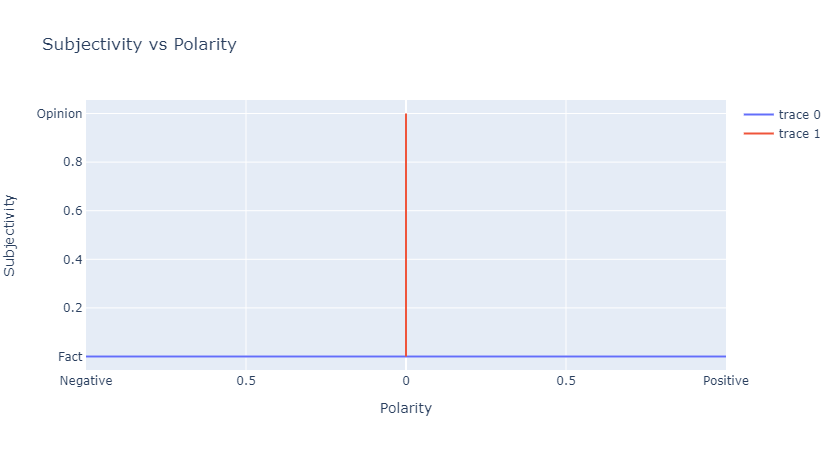

In [39]:
polarity_points = np.linspace(start=-1, stop=1, num=200)
polarity_y = np.zeros(200)

subjectivity_points = np.linspace(start=0, stop=1, num=100)
subjectivity_x = np.zeros(100)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x = polarity_points, 
    y = polarity_y))

fig.add_trace(go.Scatter(
    x = subjectivity_x, 
    y = subjectivity_points))

fig.update_layout(title='Subjectivity vs Polarity', 
                  xaxis_title='Polarity', 
                  yaxis_title='Subjectivity', 
                  xaxis = dict(
                      tickmode='array', 
                      tickvals=[-1, -0.5, 0, 0.5, 1.0], 
                      ticktext=['Negative', '0.5', '0', '0.5', 'Positive']), 
                  yaxis = dict(tickmode='array', 
                               tickvals=[0, 0.2, 0.4, 0.6, 0.8, 1.0], 
                               ticktext=['Fact', '0.2', '0.4', '0.6', '0.8', 'Opinion']) )

fig.write_image('project_notes_or_data/photos_for_presentation/subjectivity_polarity_key.jpg', scale=2.0)

fig.show()

# fig.update_layout()